<a href="https://colab.research.google.com/github/Tim3s/PL-teamproject-dataprocessing/blob/main/PL_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
user_profile_csv = pd.read_excel("drive/MyDrive/PL_team_project/user_profile.xlsx")

In [10]:
user_profile_csv.head()

,id,sex,age
0,228,F,80
1,230,F,73
2,232,M,84
3,273,F,83
4,276,F,56


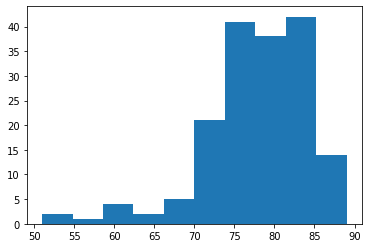

In [11]:
import matplotlib.pyplot as plt
plt.hist(user_profile_csv['age'])
plt.show()

In [12]:
np.unique(user_profile_csv['sex'], return_counts=True)

(array(['F', 'M'], dtype=object), array([130,  40]))

In [13]:
user_profile_csv

,id,sex,age
0,228,F,80
1,230,F,73
2,232,M,84
3,273,F,83
4,276,F,56
...,...,...,...
165,30075,M,53
166,30076,F,83
167,30077,M,78
168,30078,M,75


In [18]:
input = []
state = np.array([])
target = []
valid = []
for num in user_profile_csv['id']:
    try:
        data = pd.read_csv('drive/MyDrive/PL_team_project/hs_' + str(num) + '_m08_0903_1355.csv', encoding='cp949')
    except:
        print('not found:', num)
        continue
    try:
        input.append((len(data[data['Z']=='매우 활동']) + 0.8 * len(data[data['Z']=='활동']) + 0.5 * len(data[data['Z'] == '미동'])) / len(data))
    except:
        print('empty:', num)
        continue
    state = np.unique(np.concatenate((np.unique(data['State']), state)))
    valid.append(num)
print(np.mean(input))
state.sort()
print(state)
print(valid)

empty: 342
empty: 509
empty: 530
empty: 537
empty: 538
empty: 540
empty: 552
empty: 574
empty: 633
empty: 635
empty: 636
empty: 653
empty: 664
empty: 667
empty: 732
empty: 804
empty: 808
empty: 1034
empty: 30043
empty: 30047
empty: 30052
empty: 30059
empty: 30061
empty: 30062
not found: 30064
not found: 30066
not found: 30067
not found: 30069
not found: 30070
not found: 30071
not found: 30072
not found: 30073
not found: 30074
not found: 30075
not found: 30076
not found: 30077
not found: 30078
not found: 30079
0.13858967923457696
['TV 보기' '간식 먹기' '간편식 준비하기' '귀가하기' '기상 약 복용' '기상하기' '꿀잠소리' '날씨 확인하기'
 '낮잠 기상하기' '낮잠자기' '냉장고 정리하기' '노래자랑' '뉴스 시청' '늦은 기상하기' '도전 실버벨' '듣는대화'
 '마음그림터' '마음세탁소' '마음스트레칭' '명언산책' '무비순이' '밥솥 열기' '밥솥 정리하기' '새벽 TV 시청'
 '새벽 간식' '새벽 화장실 이용' '석식' '설거지 하기' '수면' '순이 특별대화' '순이극장' '순이대화' '순이인생'
 '순이책방' '순이체조' '시낭독' '시시콜콜' '식사' '식사 중 TV 시청' '식후 약 복용' '실내운동하기' '실외운동하기'
 '야식 먹기' '영어교실' '외출하기' '요가명상' '운동 후 귀가' '음식 꺼내기' '이른 기상하기' '일반 약 복용'
 '일어교실' '전자렌지 청소하기' '조식' '주방 정리하기' '중식' '집 

In [19]:
print(np.mean(input), np.std(input), np.max(input))

0.13858967923457696 0.13737835161118045 0.6800415800415801


In [20]:
print(valid[np.argmax(input)])

760


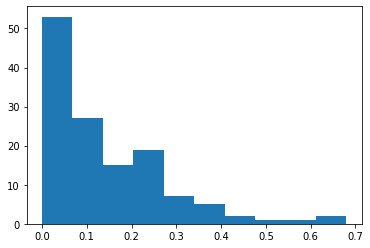

In [21]:
plt.hist(input)
plt.show()

In [22]:
input /= np.max(input)

In [83]:
state_input = np.empty(shape=(0, len(state)))
print(state_input.shape)

(0, 58)


In [84]:
for num in valid:
    data = pd.read_csv('drive/MyDrive/PL_team_project/hs_' + str(num) + '_m08_0903_1355.csv', encoding='cp949')
    result = np.sum([state==i for i in data['State']], axis=0)
    result = result / np.sum(result)
    # print(result)
    # print(np.array([result]))
    # print(state_input)
    state_input = np.append(state_input, np.array([result]), axis=0)

In [85]:
print(state_input.shape)

(132, 58)


In [86]:
from sklearn.cluster import KMeans

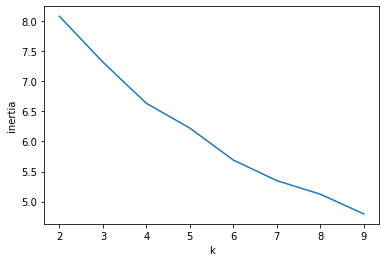

In [107]:
inertia = []
for k in range(2, 10):
    km = KMeans(n_clusters=k)
    km.fit(state_input)
    inertia.append(km.inertia_)
plt.plot(range(2, 10), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [122]:
km = KMeans(n_clusters=4)
km.fit(state_input)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [123]:
valid = np.array(valid)
for i in range(km.n_clusters):
    print(valid[km.labels_==i])

[  315   341   505   511   513   532   546   650   665   673   760  1013
  1019  1020  1022  1030  1050  1054 30048 30050 30053 30055 30056 30063]
[  230   490   494   512   518   519   534   536   547   581   644   672
   720   768   796   800   802   803   806   811   812  1003  1004  1012
  1018  1021  1026  1028  1032  1033  1037  1040  1042  1052  1055  1057
  1059  1061  1062 30016 30035 30038 30039 30041 30044 30046 30058]
[  232   276   476   479   486   495   504   520   535   542   544   570
   585   654   655   658   668   797   799   801   805   807   809   813
  1001  1002  1008  1009  1016  1036  1039  1045  1046  1048  1053  1056
 30040 30045 30049]
[ 228  273  339  477  488  492  496  527  580  582  583  642  656  661
  662  705 1011 1015 1027 1029 1043 1047]
[]


In [124]:
# most = []
for i in range(km.n_clusters):
    print('num of people in cluster:', np.sum(km.labels_==i))
    print('mostly done activity:', state[np.argmax(np.mean(state_input[km.labels_==i], axis=0))])
    # print(np.round(np.mean(state_input[km.labels_==i], axis=0), 3))
    # most.append(np.argmax(np.mean(state_input[km.labels_==i], axis=0)))
    # print(np.round(np.std(state_input[km.labels_==i], axis=0), 3))
    print('\n')

num of people in cluster: 24
mostly done activity: 외출하기


num of people in cluster: 47
mostly done activity: TV 보기


num of people in cluster: 39
mostly done activity: 음식 꺼내기


num of people in cluster: 22
mostly done activity: 취미활동




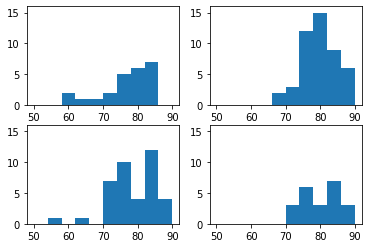

In [141]:
user_profile = user_profile_csv.to_numpy()
fig, axs = plt.subplots((km.n_clusters + 1) // 2, 2)
for i in range(km.n_clusters):
    tmp = valid[km.labels_==i]
    axs[i // 2, i % 2].hist([user_profile[j][2] for j in range(len(user_profile)) if user_profile[j][0] in tmp], range=(50, 90))
    axs[i // 2, i % 2].set_ylim([0, 16])